In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baseline

In [3]:
b1 = pd.read_csv('B1.csv')
b1.head()

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,Baseline,2024-11-07 19:19:38.354843,-119.928605,1,0,True,6.220874,6.220874,6.337673,6.337673,False,13.973401,15.174075,-3.989237,574.896698,99.717858,0.0
1,Baseline,2024-11-07 19:19:38.404248,-119.879201,1,0,True,6.209714,6.209714,6.272178,6.272178,False,13.949313,16.007398,-4.275813,567.078857,93.899710,0.0
2,Baseline,2024-11-07 19:19:38.454937,-119.828512,1,0,True,6.061811,6.061811,6.230929,6.230929,False,13.629603,15.136723,-4.205123,573.472214,92.126184,0.0
3,Baseline,2024-11-07 19:19:38.505153,-119.778294,1,0,True,5.508698,5.508698,6.111207,6.111207,False,12.426430,15.874322,-3.759838,572.186241,92.236555,0.0
4,Baseline,2024-11-07 19:19:38.554754,-119.728693,1,0,True,5.204373,5.204373,5.948708,5.948708,False,11.759589,17.352228,-3.544114,564.944839,95.053174,0.0


In [4]:
# Data Validation : Baseline
# Drop these values
false_flags = round(100.0*b1[b1['face_detection_flag']==False]['Time'].count()/b1['Time'].count(),2)
duration  = b1[b1['face_detection_flag']==False]['Time'].count()//20
total_duration = b1['Time'].count()//20
print("False Face Detection Flags")
print(f"Percentage of Total Data : {false_flags}%")
print(f"Duration of False Flags : {duration//60} Minutes {duration%60} Seconds")
print(f"Total Duration of Video : {total_duration//60} Minutes {total_duration%60} Seconds")

False Face Detection Flags
Percentage of Total Data : 58.3%
Duration of False Flags : 1 Minutes 9 Seconds
Total Duration of Video : 1 Minutes 59 Seconds


In [5]:
# Frequency Check
b1['Time'] = pd.to_datetime(b1['Time'],format = '%Y-%m-%d %H:%M:%S.%f')
std = b1['Time'].diff().dt.total_seconds().std()
b1['Time'].diff().dt.total_seconds().describe()

,Time
count,2390.000000
mean,0.050180
std,0.002117
min,0.045384
25%,0.049767
50%,0.050101
75%,0.050414
max,0.100928


In [6]:
time_diffs = b1['Time'].diff().dt.total_seconds().dropna()

std = time_diffs.std()

lower_bound = 0.05 - std
upper_bound = 0.05 + std

above_count = time_diffs[time_diffs > upper_bound].count()
below_count = time_diffs[time_diffs < lower_bound].count()

print(f"Count above {upper_bound:.5f} seconds: {above_count}")
print(f"Count below {lower_bound:.5f} seconds: {below_count}")

Count above 0.05212 seconds: 14
Count below 0.04788 seconds: 3


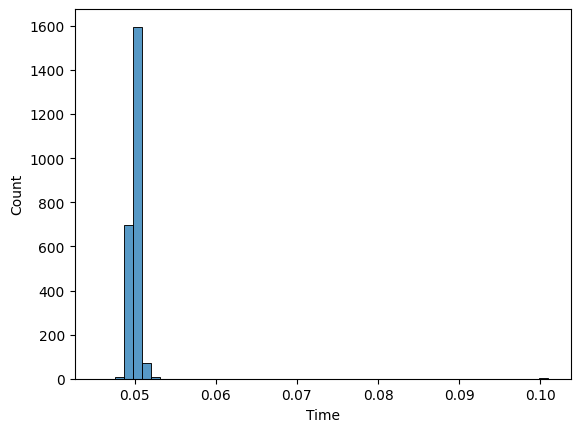

In [7]:
sns.histplot(b1['Time'].diff().dt.total_seconds().dropna(), bins=50, kde=False)
plt.show()

In [8]:
# print(b1['current height'].mean())

# print(b1['threshold'])

# b1[b1['current height']!=b1['filtered height']]

"""
If both 'current height' and 'filtered height' are floating-point numbers, the issue is likely due to floating-point precision errors. This happens because floating-point numbers cannot always be
represented exactly in binary, leading to tiny differences that aren't visible when printed.
Solution: Use np.isclose()
Instead of using !=, try checking for approximate equality using NumPy:
np.isclose() checks if two numbers are approximately equal within a small tolerance. atol=1e-9 allows differences smaller than 10^-9
"""

chk = b1[(~b1['current height'].isna())&(~b1['filtered height'].isna())]

chk_2 = chk[~np.isclose(chk['current height'], chk['filtered height'], atol=1e-9)]

print("Number of Rows : ",chk_2.shape[0])

chk_2.head()

# b1[b1['current height']==b1['filtered height']]

# b1[['current height','filtered height']].dtypes

Number of Rows :  48


,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
13,Baseline,2024-11-07 19:19:39.005031,-119.278403,1,0,True,7.595453,7.413827,6.384356,6.384356,True,16.899733,9.249474,0.304840,452.349625,43.423934,0.0
40,Baseline,2024-11-07 19:19:40.358159,-117.925289,1,0,True,2.295910,2.337357,5.669018,5.669018,False,5.247119,8.502114,-0.551253,568.126068,10.879333,0.0
477,Baseline,2024-11-07 19:20:02.300746,-95.982688,1,0,True,7.471860,7.293940,5.455726,5.455726,True,16.640059,5.253959,0.565049,476.331024,40.350312,0.0
484,Baseline,2024-11-07 19:20:02.650704,-95.632744,1,0,True,7.018969,7.472800,5.579775,5.579775,True,15.682552,14.253720,-0.034437,587.880287,55.829068,0.0
693,Baseline,2024-11-07 19:20:13.121504,-85.161944,1,0,True,7.882605,8.272875,5.774334,5.774334,True,17.500281,13.629289,0.459146,547.773209,30.868506,0.0


In [9]:
b1.head(1) # Why is average_height different from both current height and filtered height for the first row {Ideally should be the same either current or filtered height}

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,Baseline,2024-11-07 19:19:38.354843,-119.928605,1,0,True,6.220874,6.220874,6.337673,6.337673,False,13.973401,15.174075,-3.989237,574.896698,99.717858,0.0


In [10]:
b2 = pd.read_csv('B2.csv')
b2.head(1) # Again current height and filtered height have the same issue

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,Baseline,2024-11-07 22:04:48.117332,-119.936464,1,0,True,5.388131,5.388131,5.0593,5.0593,True,12.162642,22.195523,-1.043931,552.924423,127.99191,0.0


In [11]:
threshold1 = b1['threshold'].tail(1).values[0] # Threshold for Contingent

threshold2 = b2['threshold'].tail(1).values[0] # Threshold for Non-contingent

print("T1 :",threshold1,"T2 :",threshold2)

T1 : 5.428931117074543 T2 : 3.2943496826511693


In [21]:
cont = pd.read_csv('Con.csv')
cont.head()

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,Acquisition,2024-11-07 19:21:51.057214,-479.961131,2,1,True,2.441857,2.851104,5.427730,5.428931,False,5.578628,-0.121545,0.051274,508.562546,122.829194,0.0
1,Acquisition,2024-11-07 19:21:51.101110,-479.917235,2,1,True,3.169134,2.926708,5.425044,5.428931,False,7.224585,-0.156165,0.017635,506.254196,120.071340,0.0
2,Acquisition,2024-11-07 19:21:51.145031,-479.873298,2,1,True,2.968712,3.035519,5.423101,5.428931,False,6.772074,-0.275405,0.025529,502.225189,116.336246,0.0
3,Acquisition,2024-11-07 19:21:51.189280,-479.829056,2,1,True,3.168630,3.101991,5.420942,5.428931,False,7.223450,-0.393235,0.058675,499.071083,112.723053,0.0
4,Acquisition,2024-11-07 19:21:51.231270,-479.787046,2,1,True,3.350934,3.290166,5.419116,5.428931,False,7.634273,-0.272965,0.018235,498.775711,115.159929,0.0


In [22]:
cont['threshold'].unique()

array([5.42893112])

In [23]:
cont['Time'] = pd.to_datetime(cont['Time'],format = '%Y-%m-%d %H:%M:%S.%f')

In [24]:
total_duration_seconds = cont['Time'].count()//20
print(f'{total_duration_seconds//60} Minutes {total_duration_seconds%60} Seconds')

# df.tail(1)

6 Minutes 14 Seconds


In [29]:
# Data Validation Contingent
print("More than one values for Time :",cont['Time'].nunique()!=1)
print()
print(cont['face_detection_flag'].value_counts())
# print("total data points:", cont.shape[0])
print()
print("Values for Null current_height and False face_detection should be equal")
print("Null current_height:",cont[cont['current height'].isnull()].shape[0])
print("False face_detection:",cont[cont['face_detection_flag']==False].shape[0])

More than one values for Time : True

face_detection_flag
True     7026
False     461
Name: count, dtype: int64

Values for Null current_height and False face_detection should be equal
Null current_height: 461
False face_detection: 461


In [26]:
false_flags = round(100.0*cont[cont['face_detection_flag']==False]['Time'].count()/cont['Time'].count(),2)
duration  = cont[cont['face_detection_flag']==False]['Time'].count()//20
total_duration = cont['Time'].count()//20
print("False Face Detection Flags")
print(f"Percentage of Total Data : {false_flags}%")
print(f"Duration of False Flags : {duration//60} Minutes {duration%60} Seconds")
print(f"Total Duration of Video : {total_duration//60} Minutes {total_duration%60} Seconds")

False Face Detection Flags
Percentage of Total Data : 6.16%
Duration of False Flags : 0 Minutes 23 Seconds
Total Duration of Video : 6 Minutes 14 Seconds


In [30]:
time_diffs = cont['Time'].diff().dt.total_seconds().dropna()

std = time_diffs.std()

lower_bound = 0.05 - std
upper_bound = 0.05 + std

above_count = time_diffs[time_diffs > upper_bound].count()
below_count = time_diffs[time_diffs < lower_bound].count()

print(f"Count above {upper_bound:.5f} seconds: {above_count}")
print(f"Count below {lower_bound:.5f} seconds: {below_count}")

Count above 0.06489 seconds: 1065
Count below 0.03511 seconds: 23


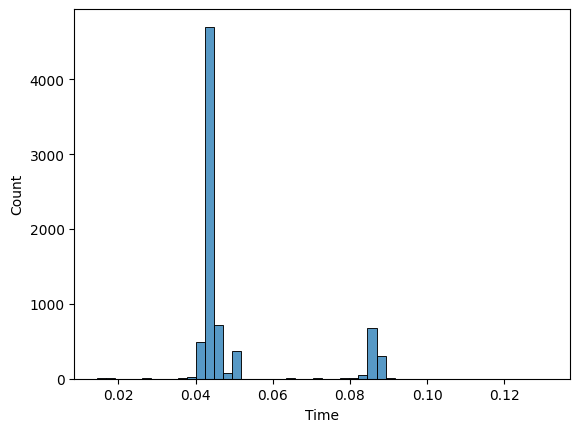

In [31]:
sns.histplot(cont['Time'].diff().dt.total_seconds().dropna(), bins=50, kde=False)
plt.show()

In [32]:
# Data Validation Non Contingent

NC = pd.read_csv('NC.csv')
NC.head()

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,NonContingent,2024-11-07 22:07:01.644743,-479.983839,3,1,True,1.435125,1.452247,3.29435,3.39435,False,3.285458,6.248820,-0.036590,488.031120,217.983398,0.0
1,NonContingent,2024-11-07 22:07:01.644743,-479.934669,3,1,True,1.574947,1.528340,3.29435,3.39435,False,3.604750,6.438886,-0.040575,487.383194,218.372269,0.0
2,NonContingent,2024-11-07 22:07:01.644743,-479.853703,3,1,True,1.444026,1.432837,3.29435,3.39435,False,3.305791,6.272083,-0.020914,486.065865,217.859230,0.0
3,NonContingent,2024-11-07 22:07:01.644743,-479.809518,3,1,True,1.504825,1.484559,3.29435,3.39435,False,3.444649,6.648389,-0.027708,486.992111,217.776918,0.0
4,NonContingent,2024-11-07 22:07:01.644743,-479.765969,3,1,True,1.567614,1.546685,3.29435,3.39435,False,3.588010,6.559953,-0.024690,485.695267,216.741571,0.0


In [44]:
print("More than one values for Time :",NC['Time'].nunique()!=1)
print()
print(NC['face_detection_flag'].value_counts())
# print("total data points:", cont.shape[0])
print()
print("Values for Null current_height and False face_detection should be equal")
print("Null current_height:",NC[NC['current height'].isnull()].shape[0])
print("False face_detection:",NC[NC['face_detection_flag']==False].shape[0])

More than one values for Time : False

face_detection_flag
True     5880
False    1131
Name: count, dtype: int64

Values for Null current_height and False face_detection should be equal
Null current_height: 1131
False face_detection: 1131


In [37]:
false_flags = round(100.0*NC[NC['face_detection_flag']==False]['Time'].count()/cont['Time'].count(),2)
duration  = NC[NC['face_detection_flag']==False]['Time'].count()//20
total_duration = NC['Time'].count()//20
print("False Face Detection Flags")
print(f"Percentage of Total Data : {false_flags}%")
print(f"Duration of False Flags : {duration//60} Minutes {duration%60} Seconds")
print(f"Total Duration of Video : {total_duration//60} Minutes {total_duration%60} Seconds")

False Face Detection Flags
Percentage of Total Data : 15.11%
Duration of False Flags : 0 Minutes 56 Seconds
Total Duration of Video : 5 Minutes 50 Seconds


In [40]:
NC['Time'] = pd.to_datetime(NC['Time'],format = '%Y-%m-%d %H:%M:%S.%f')

time_diffs = NC['Time'].diff().dt.total_seconds().dropna()

std = time_diffs.std()

lower_bound = 0.05 - std
upper_bound = 0.05 + std

above_count = time_diffs[time_diffs > upper_bound].count()
below_count = time_diffs[time_diffs < lower_bound].count()

print(f"Count above {upper_bound:.5f} seconds: {above_count}")
print(f"Count below {lower_bound:.5f} seconds: {below_count}")

Count above 0.05000 seconds: 0
Count below 0.05000 seconds: 7010


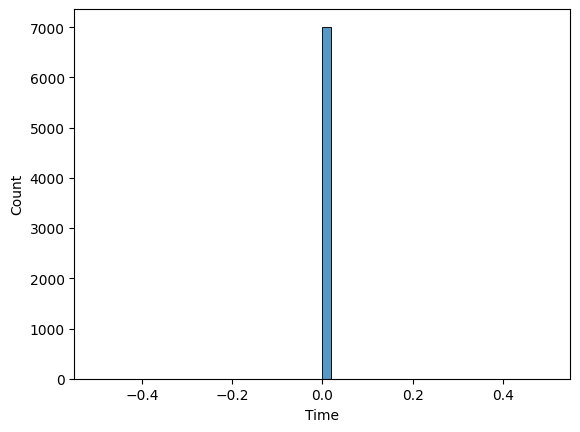

In [41]:
sns.histplot(NC['Time'].diff().dt.total_seconds().dropna(), bins=50, kde=False)
plt.show()

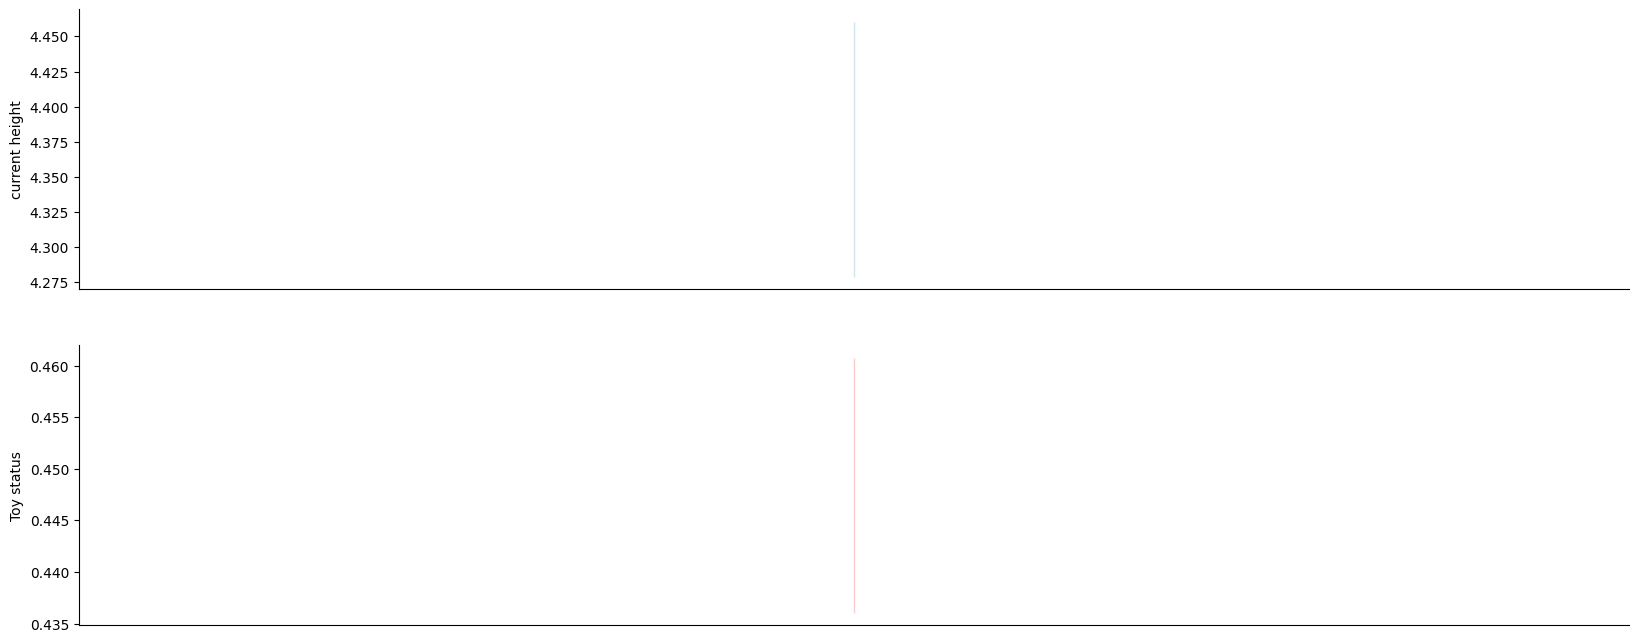

In [ ]:
# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# First plot
sns.lineplot(data=df_plot, x='Time', y='current height', ax=ax[0])
ax[0].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[0])  # Remove top and right spines

# Second plot
sns.lineplot(data=df_plot, x='Time', y='Toy status', ax=ax[1],color = 'r')
ax[1].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[1])  # Remove top and right spines
plt.show()

In [ ]:
d = pd.read_csv('Delhi.csv')

d['Time'] = pd.to_datetime(d['Time'],format = '%Y-%m-%d %H:%M:%S.%f')

In [ ]:
d

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,Acquisition,2024-11-07 19:21:51.057214,-479.961131,2,1,True,2.441857,2.851104,5.427730,5.428931,False,5.578628,-0.121545,0.051274,508.562546,122.829194,0.0
1,Acquisition,2024-11-07 19:21:51.101110,-479.917235,2,1,True,3.169134,2.926708,5.425044,5.428931,False,7.224585,-0.156165,0.017635,506.254196,120.071340,0.0
2,Acquisition,2024-11-07 19:21:51.145031,-479.873298,2,1,True,2.968712,3.035519,5.423101,5.428931,False,6.772074,-0.275405,0.025529,502.225189,116.336246,0.0
3,Acquisition,2024-11-07 19:21:51.189280,-479.829056,2,1,True,3.168630,3.101991,5.420942,5.428931,False,7.223450,-0.393235,0.058675,499.071083,112.723053,0.0
4,Acquisition,2024-11-07 19:21:51.231270,-479.787046,2,1,True,3.350934,3.290166,5.419116,5.428931,False,7.634273,-0.272965,0.018235,498.775711,115.159929,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Acquisition,2024-11-07 19:28:05.963479,-105.054833,2,1,True,8.516885,8.350693,6.674977,5.428931,True,18.812714,5.126652,0.555572,496.614075,70.777345,0.0
7483,Acquisition,2024-11-07 19:28:06.049167,-104.969148,2,1,True,7.937788,8.031178,6.675341,5.428931,True,17.615244,4.356951,0.569880,487.072220,71.620996,0.0
7484,Acquisition,2024-11-07 19:28:06.092719,-104.925575,2,1,True,8.134217,8.068741,6.675481,5.428931,True,18.023265,3.924348,0.547473,483.298912,72.541072,0.0
7485,Acquisition,2024-11-07 19:28:06.136388,-104.881914,2,1,True,8.183789,8.167265,6.675635,5.428931,True,18.125940,4.143237,0.506654,480.137901,73.853359,0.0


In [ ]:
d['face_detection_flag'].value_counts()

,count
face_detection_flag,
True,7026
False,461


In [ ]:
d['Toy status'].unique()

d['head above the threshold'].unique()

array([False, True, nan], dtype=object)

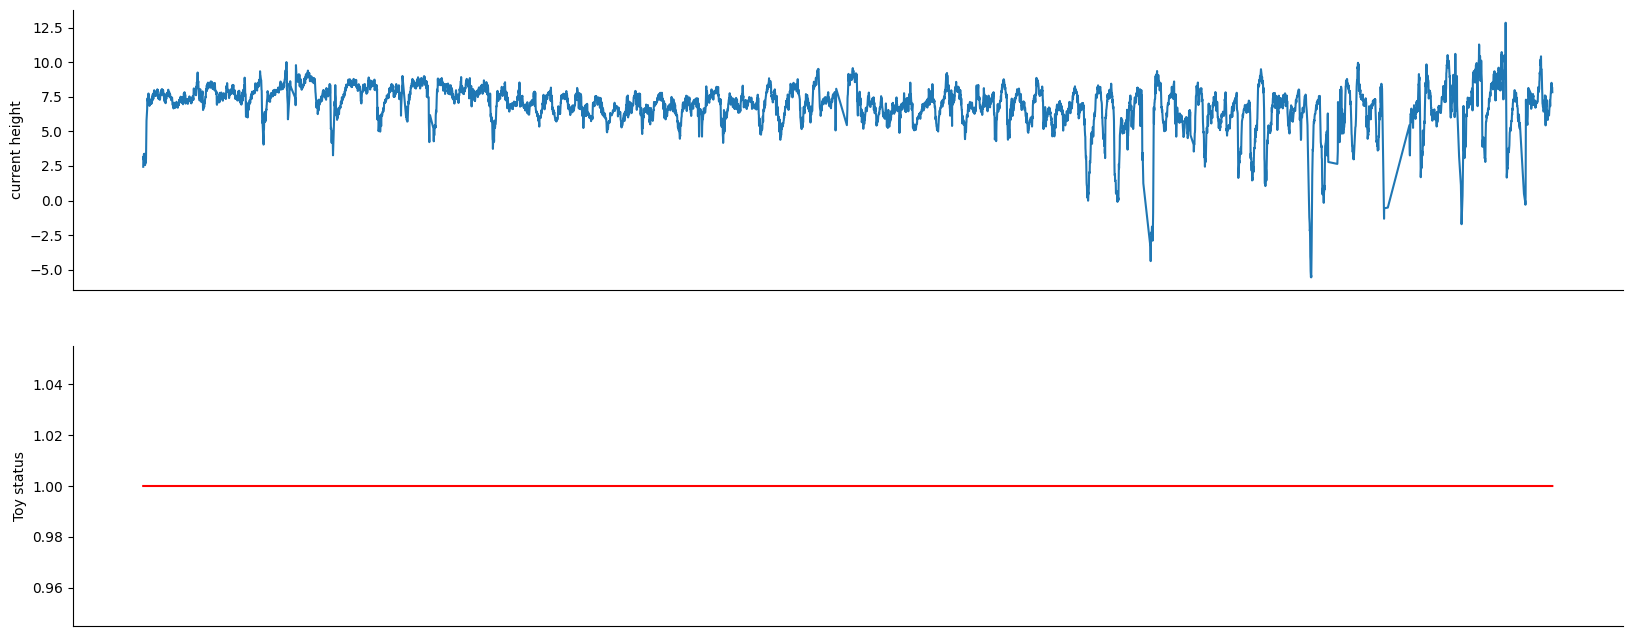

In [45]:
df_plot = cont[cont['face_detection_flag']==True][['Time','current height','head above the threshold','Toy status']]

# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# First plot
sns.lineplot(data=df_plot, x='Time', y='current height', ax=ax[0])
ax[0].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[0])  # Remove top and right spines

# Second plot
sns.lineplot(data=df_plot, x='Time', y='Toy status', ax=ax[1],color = 'r')
ax[1].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[1])  # Remove top and right spines
plt.show()

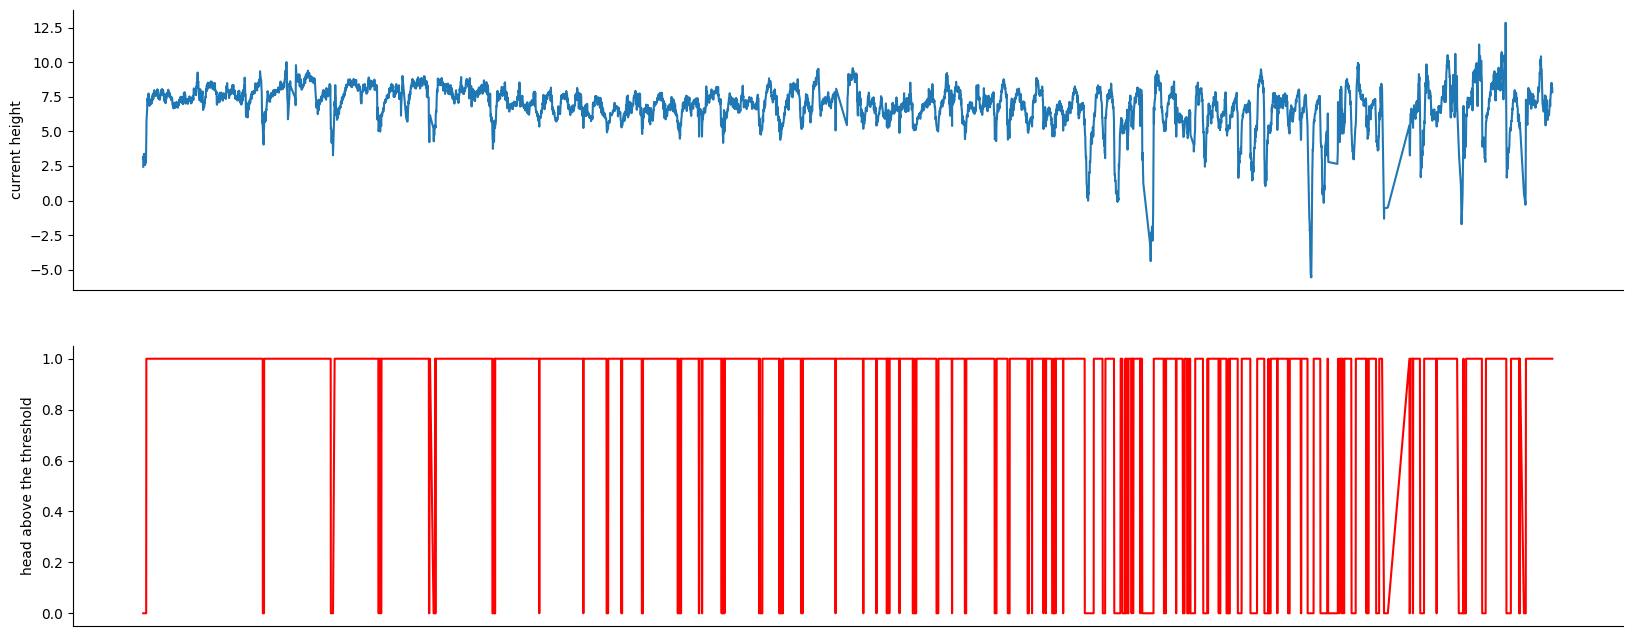

In [46]:
df_plot = cont[cont['face_detection_flag']==True][['Time','current height','head above the threshold','Toy status']]

# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# First plot
sns.lineplot(data=df_plot, x='Time', y='current height', ax=ax[0])
ax[0].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[0])  # Remove top and right spines

# Second plot
sns.lineplot(data=df_plot, x='Time', y='head above the threshold', ax=ax[1],color = 'r')
ax[1].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[1])  # Remove top and right spines
plt.show()

In [ ]:
df_plot['head above the threshold'].unique()

array([False, True], dtype=object)

In [ ]:
# d.count()//20
# 374//60

6

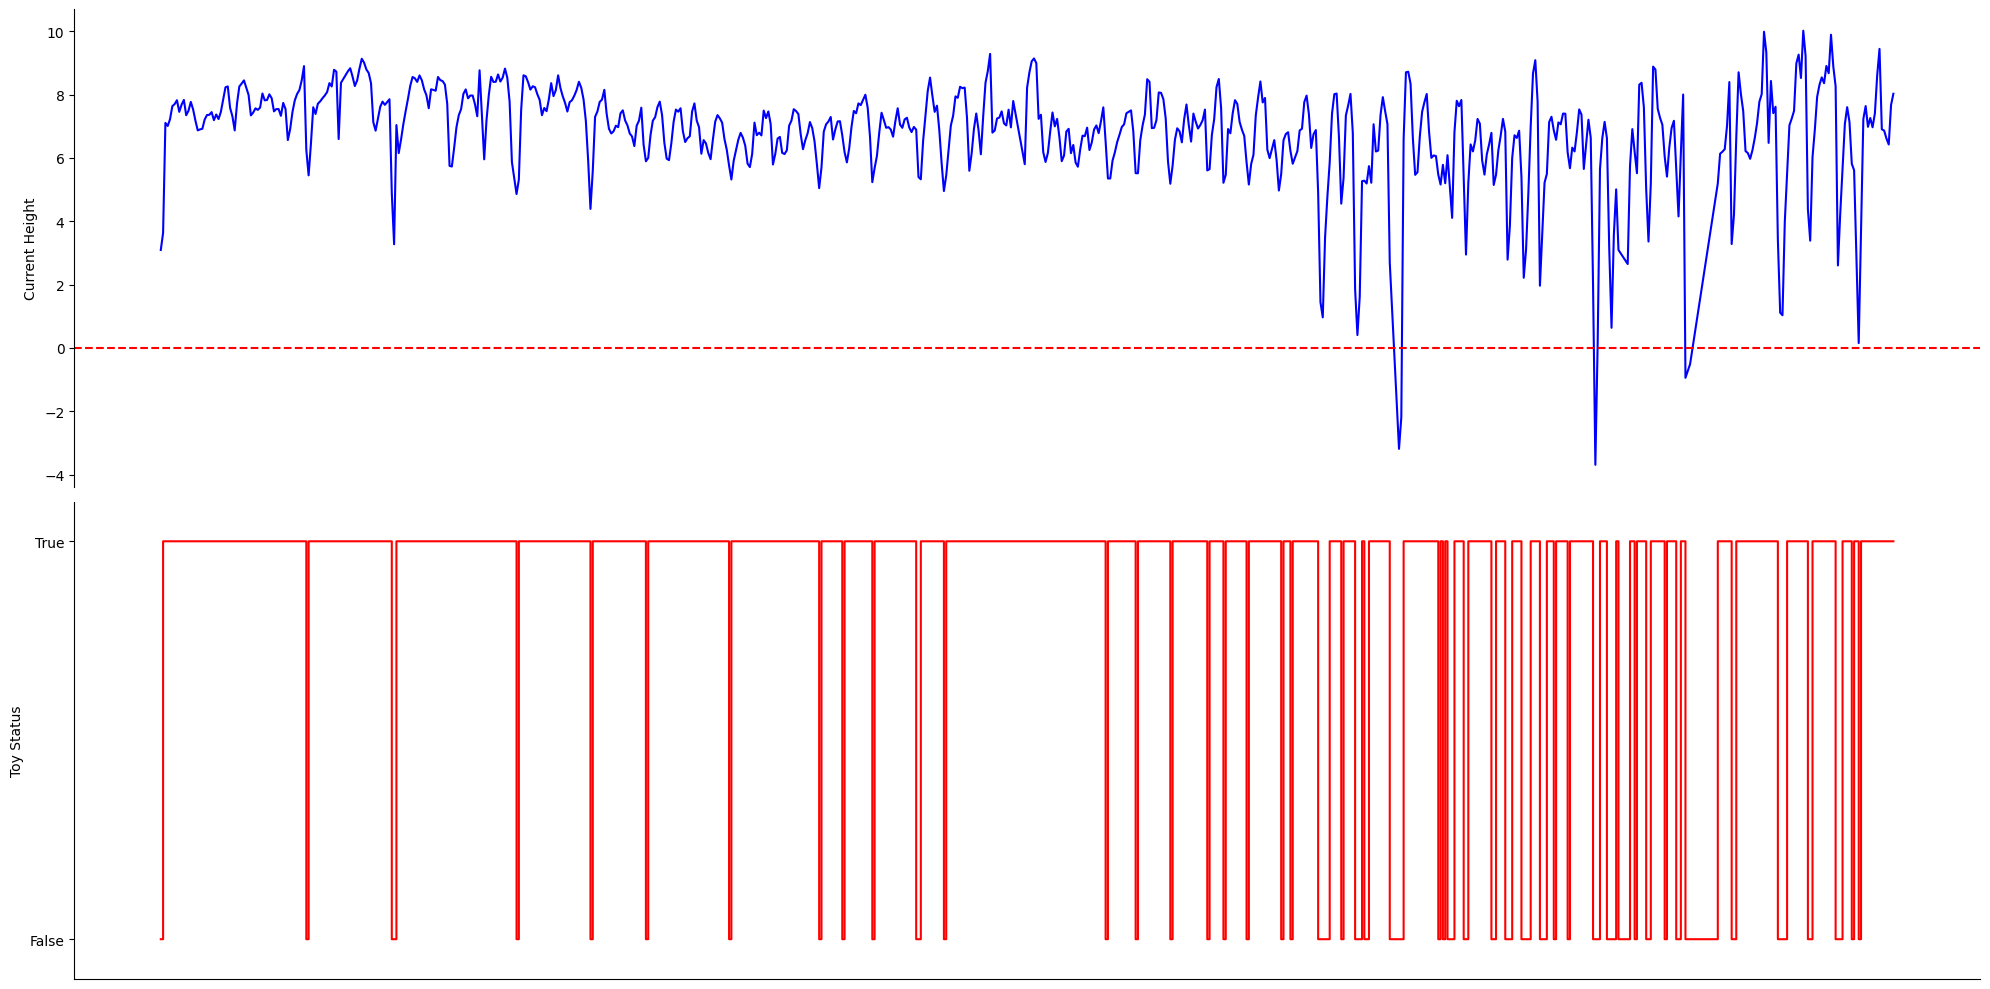

Total Duration : 5 Minutes 11 Seconds


In [48]:
df_plot = cont[cont['face_detection_flag'] == True][['Time', 'current height', 'head above the threshold', 'Toy status']]

# Ensure sorting before resampling
df_plot = df_plot.sort_values(by='Time')

# Resampling
height_resampled = df_plot.set_index('Time')[['current height']].resample('500ms').mean()
threshold_resampled = df_plot.set_index('Time')[['head above the threshold']].resample('500ms').last()

# Combine resampled data
df_resampled = pd.concat([height_resampled, threshold_resampled], axis=1).reset_index()

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# First plot - Current Height
sns.lineplot(
    data=df_resampled,
    x='Time',
    y='current height',
    ax=ax1,
    linewidth=1.5,
    color='blue'
)
ax1.set_ylabel('Current Height')
ax1.grid(False)
ax1.set_xticks([])  # Remove x-axis ticks
ax1.set_xlabel('')
sns.despine(ax=ax1, bottom=True)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

# Second plot - Head Above Threshold
sns.lineplot(
    data=df_resampled,
    x='Time',
    y='head above the threshold',
    ax=ax2,
    linewidth=1.5,
    color='red',
    drawstyle='steps-post'
)
ax2.set_ylabel('Toy Status')
ax2.set_ylim(-0.1, 1.1)
ax2.grid(False)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['False', 'True'])
sns.despine(ax=ax2)

# Adjust layout and display
plt.tight_layout()
plt.show()

total_duration = cont['head above the threshold'].value_counts().values[0]
print(f"Total Duration : {total_duration//1200} Minutes {(total_duration//20)%60} Seconds")

In [ ]:
NC = pd.read_csv('NC.csv')
NC.head()
# NC['Toy status'].unique()

,Phase,Time,Relative Time,phase of data collection,Toy status,face_detection_flag,current height,filtered height,average_height,threshold,head above the threshold,x,y,z,nose_x,nose_y,set_threshold_flag
0,NonContingent,2024-11-07 22:07:01.644743,-479.983839,3,1,True,1.435125,1.452247,3.29435,3.39435,False,3.285458,6.248820,-0.036590,488.031120,217.983398,0.0
1,NonContingent,2024-11-07 22:07:01.644743,-479.934669,3,1,True,1.574947,1.528340,3.29435,3.39435,False,3.604750,6.438886,-0.040575,487.383194,218.372269,0.0
2,NonContingent,2024-11-07 22:07:01.644743,-479.853703,3,1,True,1.444026,1.432837,3.29435,3.39435,False,3.305791,6.272083,-0.020914,486.065865,217.859230,0.0
3,NonContingent,2024-11-07 22:07:01.644743,-479.809518,3,1,True,1.504825,1.484559,3.29435,3.39435,False,3.444649,6.648389,-0.027708,486.992111,217.776918,0.0
4,NonContingent,2024-11-07 22:07:01.644743,-479.765969,3,1,True,1.567614,1.546685,3.29435,3.39435,False,3.588010,6.559953,-0.024690,485.695267,216.741571,0.0


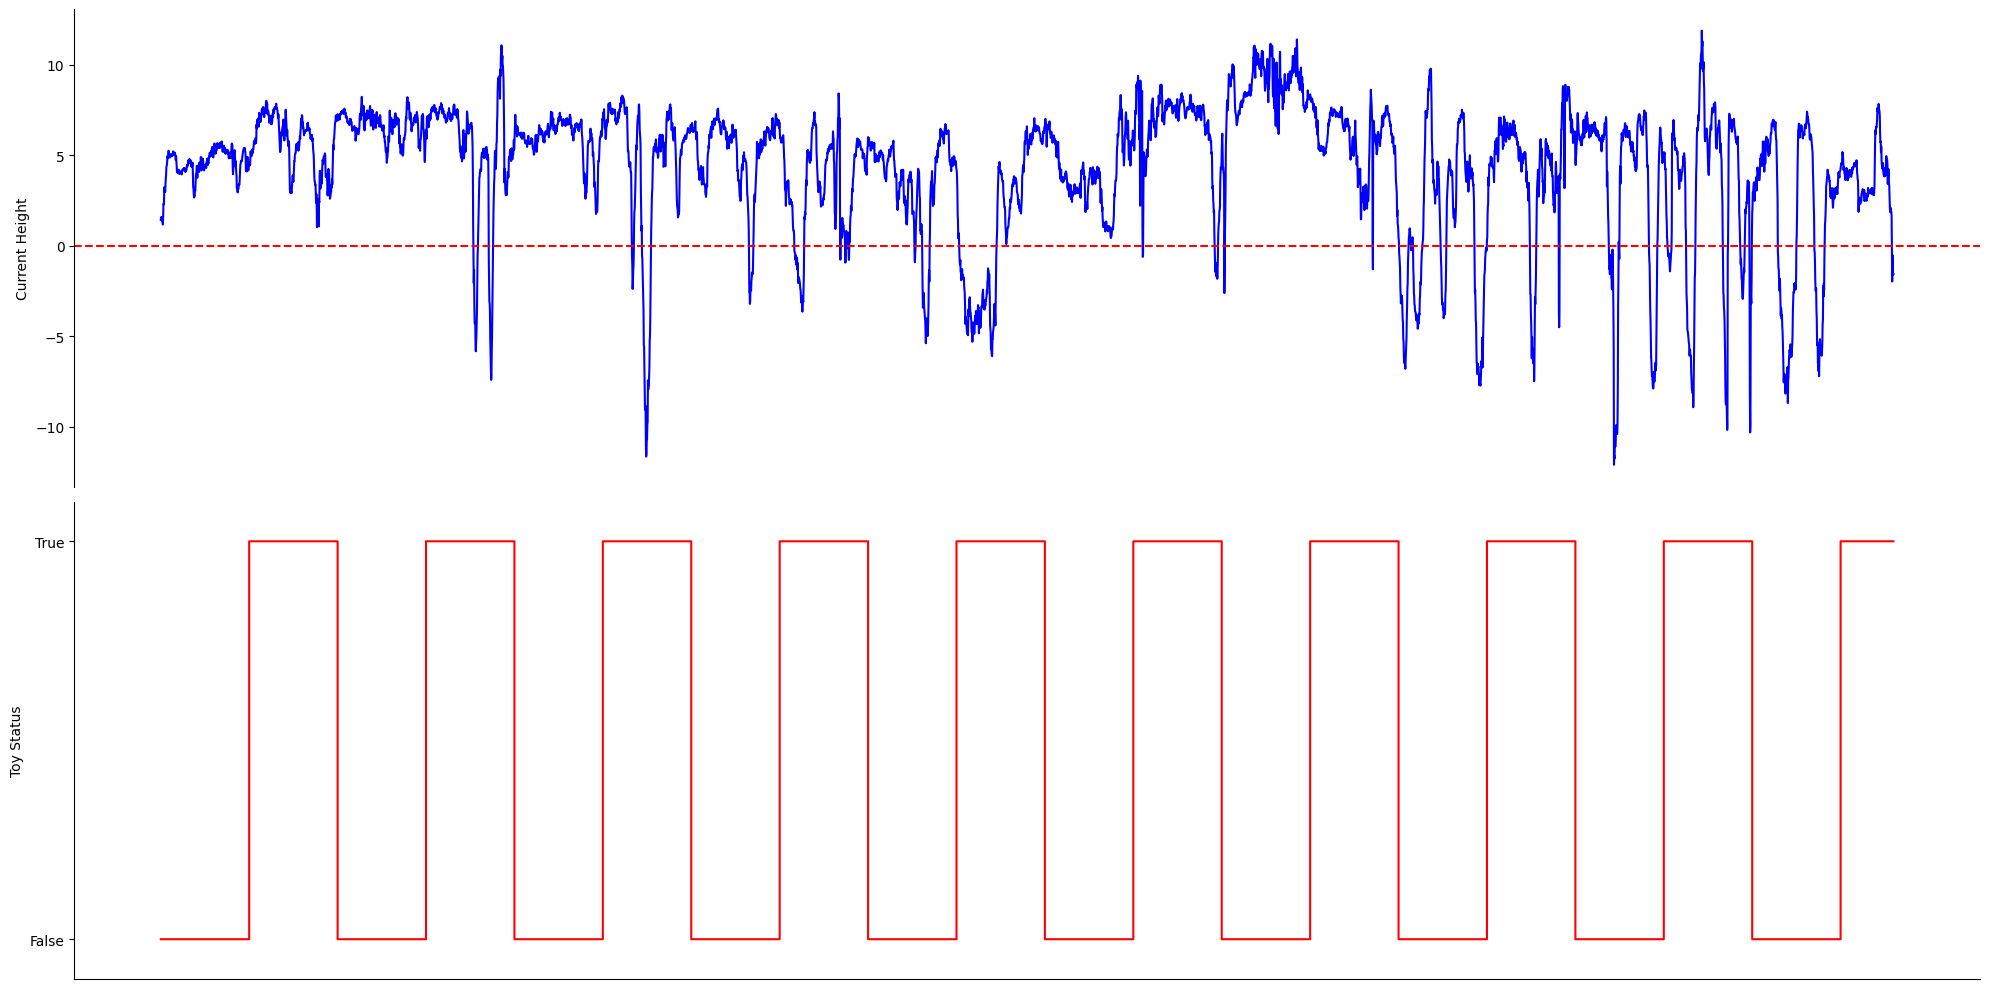

In [51]:
# Filter and reset index
df_plot = NC[NC['face_detection_flag']==True][['Time','current height','head above the threshold','Toy status']].reset_index(drop=True)

# Convert time to datetime
df_plot['Time'] = pd.to_datetime(df_plot['Time'], format='%Y-%m-%d %H:%M:%S.%f')

# Create alternating toy status every 300 rows
df_plot['Toy status'] = (df_plot.index // 300 % 2).astype(int)

# Add row numbers
df_plot['row_number'] = range(1, len(df_plot) + 1)

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# First plot - Current Height
sns.lineplot(
    data=df_plot,
    x='row_number',
    y='current height',
    ax=ax1,
    linewidth=1.5,
    color='blue'
)
ax1.set_ylabel('Current Height')
ax1.grid(False)
ax1.set_xticks([])  # Remove x-axis ticks
ax1.set_xlabel('')
sns.despine(ax=ax1, bottom=True)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

# Second plot - Toy Status
sns.lineplot(
    data=df_plot,
    x='row_number',
    y='Toy status',
    ax=ax2,
    linewidth=1.5,
    color='red',
    drawstyle='steps-post'
)
ax2.set_ylabel('Toy Status')
ax2.set_ylim(-0.1, 1.1)
ax2.grid(False)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['False', 'True'])
sns.despine(ax=ax2)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [50]:
df_plot

,Time,current height,head above the threshold,Toy status,row_number
0,2024-11-07 22:07:01.644743,1.435125,False,0,1
1,2024-11-07 22:07:01.644743,1.574947,False,0,2
2,2024-11-07 22:07:01.644743,1.444026,False,0,3
3,2024-11-07 22:07:01.644743,1.504825,False,0,4
4,2024-11-07 22:07:01.644743,1.567614,False,0,5
...,...,...,...,...,...
7005,2024-11-07 22:07:01.644743,-1.974553,False,1,5876
7006,2024-11-07 22:07:01.644743,-0.508420,False,1,5877
7007,2024-11-07 22:07:01.644743,-1.065774,False,1,5878
7008,2024-11-07 22:07:01.644743,-1.612980,False,1,5879


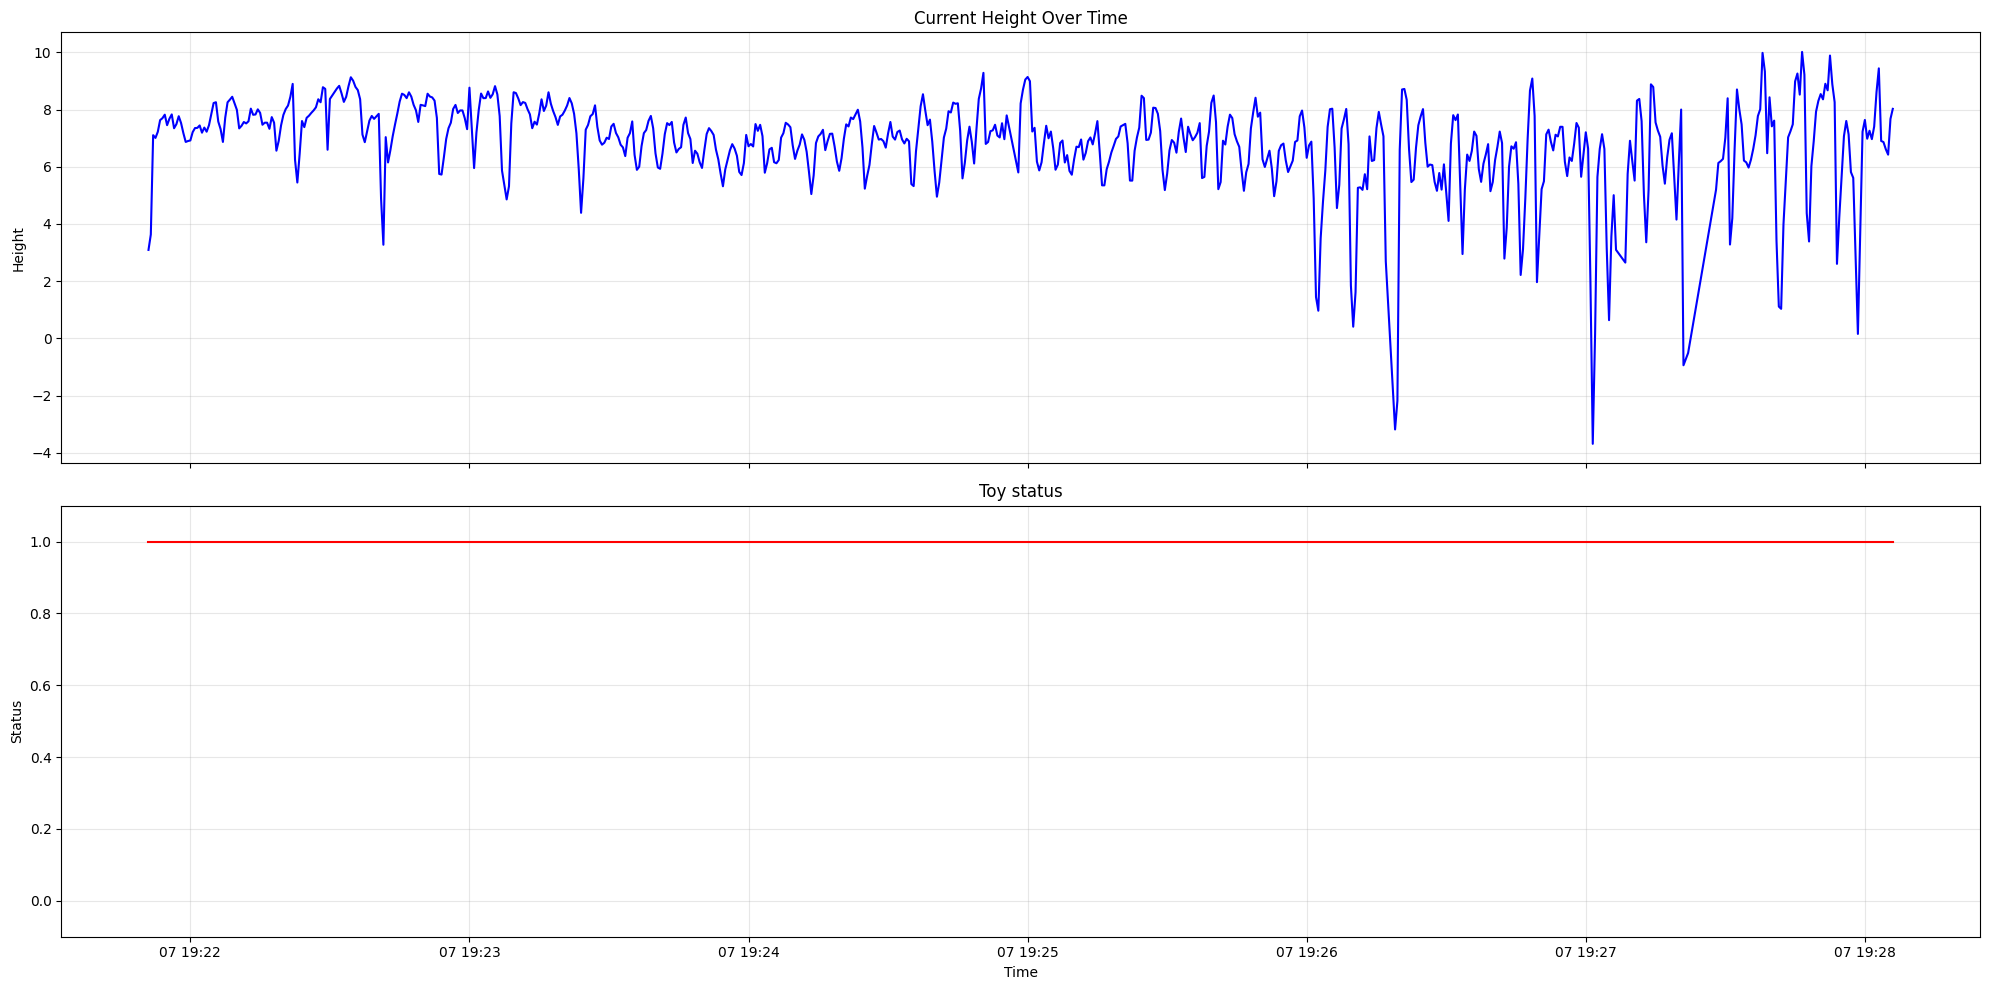

In [ ]:
df_plot = d[d['face_detection_flag']==True][['Time','current height','head above the threshold','Toy status']]

# Resample data to reduce density (e.g., taking mean every 0.5 seconds)
df_resampled = df_plot.set_index('Time').resample('500ms').mean().reset_index()

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# First plot - Current Height
sns.lineplot(
    data=df_resampled,
    x='Time',
    y='current height',
    ax=ax1,
    linewidth=1.5,
    color='blue'
)
ax1.set_title('Current Height Over Time')
ax1.set_ylabel('Height')
ax1.grid(True, alpha=0.3)

# Second plot - Head Above Threshold
sns.lineplot(
    data=df_resampled,
    x='Time',
    y='Toy status',
    ax=ax2,
    linewidth=1.5,
    color='red'
)
ax2.set_title('Toy status')
ax2.set_ylabel('Status')
ax2.set_ylim(-0.1, 1.1)  # Add some padding to binary values
ax2.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:

# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# First plot
sns.lineplot(data=df_plot, x='Time', y='current height', ax=ax[0])
ax[0].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[0])  # Remove top and right spines

# Second plot
sns.lineplot(data=df_plot, x='Time', y='Toy status', ax=ax[1],color = 'r')
ax[1].set_xticks([])  # Remove x-axis ticks
sns.despine(ax=ax[1])  # Remove top and right spines
plt.show()


In [ ]:
df_plot = (df.groupby(df['Time'].dt.floor('s'))
               .agg({
                   'Overall class': pd.Series.mode,
                   'B': 'mean',
                   'Acceleration': 'mean'
               })
               .round(4)
               .reset_index())

,Time
0,2025-02-04 16:57:27
1,2025-02-04 16:57:27
2,2025-02-04 16:57:28
3,2025-02-04 16:57:28
4,2025-02-04 16:57:28
...,...
3996,2025-02-04 17:00:48
3997,2025-02-04 17:00:48
3998,2025-02-04 17:00:48
3999,2025-02-04 17:00:48


In [ ]:
def contigent_head_above_threshold_2(df, chunk_time=120):
    """
    This modifies the behaviour of the earlier function to only display the size of the chunk when it is not equal to the
    desired size as provided by the user {By default 120 seconds}
    """

    df_plot = df[['head above the threshold', 'Toy status', 'Time']]
    chunk_size = chunk_time * 20
    chunk_results = []

    total_video_length = df_plot['Time'].count() * 50 / 1000
    head_above_threshold_total_time = df_plot[df_plot['head above the threshold'] == True]['Time'].count() * 50 / 1000
    print("Total Video Length : ", total_video_length // 60, 'minutes', round(total_video_length % 60, 2), 'seconds')
    print("Head Above Threshold Time : ", head_above_threshold_total_time // 60, 'minutes', round(head_above_threshold_total_time % 60, 2), 'seconds')

    for i, chunk_start in enumerate(range(0, len(df), chunk_size)):
        chunk = df.iloc[chunk_start:chunk_start + chunk_size]

        count = ((chunk['head above the threshold'].shift(1) == False) &
                 (chunk['head above the threshold'] == True)).sum()
        chunk_time = chunk['Time'].count() * 50 / 1000
        head_above_threshold_total_time = (
            chunk[chunk['head above the threshold'] == True]['Time'].count() * 50 / 1000
        )

        # Check if the chunk size is less than the expected chunk size
        if len(chunk) < chunk_size:
            chunk_results.append({
                'Chunk': f'Chunk {i + 1}',
                'chunk_time': chunk_time,
                'head_above_threshold_total_time': head_above_threshold_total_time,
                'count': count
            })
        else:
            chunk_results.append({
                'Chunk': f'Chunk {i + 1}',
                'chunk_time': None,  # Set chunk_time to None for full-sized chunks
                'head_above_threshold_total_time': head_above_threshold_total_time,
                'count': count
            })

    results_df = pd.DataFrame(chunk_results)

    # Ensure the 'Chunk' column is treated as a categorical variable with the correct order
    results_df['Chunk'] = pd.Categorical(results_df['Chunk'],
                                         categories=sorted(results_df['Chunk'].unique(), key=lambda x: int(x.split()[1])),
                                         ordered=True)

    # Melt the DataFrame for plotting
    melted_df = results_df.melt(id_vars='Chunk', value_vars=['chunk_time', 'head_above_threshold_total_time', 'count'])

    # Filter out rows where chunk_time is None
    melted_df = melted_df[~((melted_df['variable'] == 'chunk_time') & (melted_df['value'].isna()))]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=melted_df, x='Chunk', y='value', hue='variable', palette='bright', order=results_df['Chunk'].cat.categories)

    for p in ax.patches:
        if p.get_height() != 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10), textcoords='offset points')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['Chunk Time', 'Head Above Threshold Total Time', 'Count'], title='Metrics')

    plt.ylabel('Time (seconds) / Count')
    plt.xlabel('Chunk')
    sns.despine()
    plt.show()